# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [2]:
# read the titanic train.csv file into a dataframe
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# show the percentage of the passengers that boarded at different ports
boarded_percentage = df['Embarked'].value_counts(normalize=True)
print(boarded_percentage)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


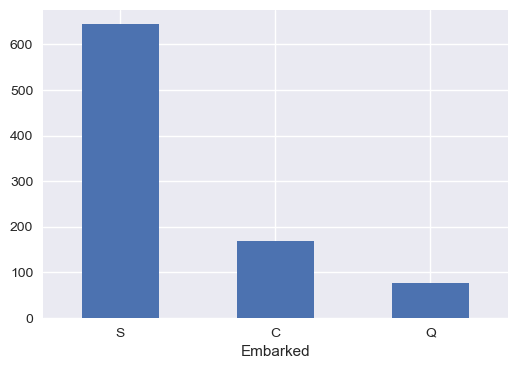

In [28]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(6, 4))
boarded_num = df.Embarked.value_counts()
boarded_num.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [30]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.
survival_counts = df[df['Survived'] == 1]['Sex'].value_counts()
total_counts = df['Sex'].value_counts()
survival_rates = survival_counts / total_counts
print("Survival rates by gender:")
print(survival_rates)

Survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: count, dtype: float64


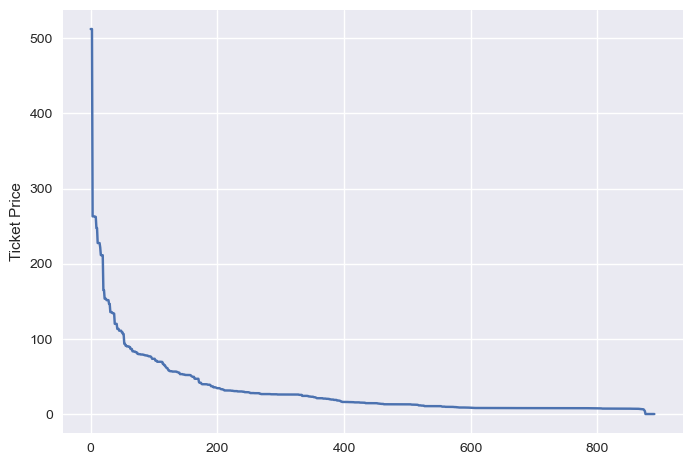

In [41]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
sorted_fares = df['Fare'].sort_values(ascending=False)
plt.figure()
plt.plot(sorted_fares.values)
plt.ylabel('Ticket Price')
plt.show()


![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



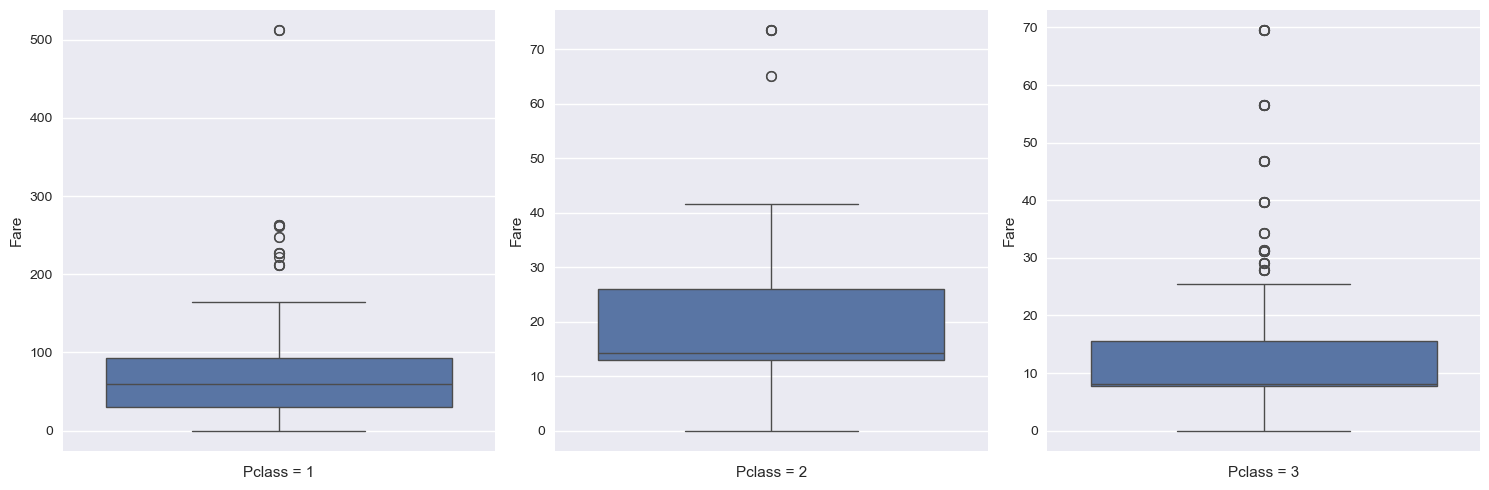

In [52]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.style.use('seaborn-v0_8')
sns.boxplot(y='Fare', data=df[df['Pclass'] == 1], ax=axes[0])
axes[0].set_xlabel('Pclass = 1')
axes[0].set_ylabel('Fare')

sns.boxplot(y='Fare', data=df[df['Pclass'] == 2], ax=axes[1])
axes[1].set_xlabel('Pclass = 2')
axes[1].set_ylabel('Fare')
sns.boxplot(y='Fare', data=df[df['Pclass'] == 3], ax=axes[2])
axes[2].set_xlabel('Pclass = 3')
axes[2].set_ylabel('Fare')
plt.tight_layout()
plt.show()


![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [47]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
survival_rates_by_class = df.groupby('Pclass')['Survived'].mean()
highest_class = survival_rates_by_class.idxmax()
highest_rate = survival_rates_by_class.max()
print(f"People with ticket class {highest_class} have the highest survival rate, which is {highest_rate:.2%}.")

People with ticket class 1 have the highest survival rate, which is 62.96%.


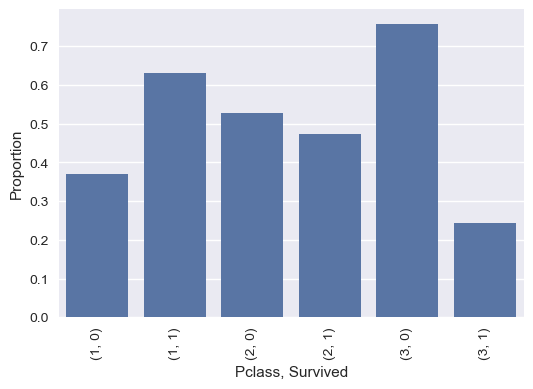

In [55]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
grouped_data = df.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')

grouped_data['Proportion'] = grouped_data.groupby('Pclass')['Count'].transform(lambda x: x / x.sum())
grouped_data['Pclass_Survived'] = "(" + grouped_data['Pclass'].astype(str) + ", " + grouped_data['Survived'].astype(str) + ")"

plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass_Survived', y='Proportion', data=grouped_data)

plt.xlabel('Pclass, Survived')
plt.ylabel('Proportion')
plt.xticks(rotation=90)

plt.show()

![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
